## Loading Libraries

In [1]:
#pip install pymongo
from pymongo import MongoClient
#pip install sodapy
from sodapy import Socrata
#pip install pandas
import pandas as pd
#pip install numpy
import numpy as np
#pip install psycopg2
import psycopg2
#pip install csv
import csv
#pip install matplotlib
import matplotlib.pyplot as plt
#pip install seaborn
import seaborn as sns

## Establishing Connection with MongoDB

In [2]:
try:
    connect = MongoClient()
    print("Connected successfully!!!")
except:
    print("Could not connect to MongoDB")

Connected successfully!!!


## Creating/Connecting to Database -

In [3]:
san_franciso_aircraft_database = connect.san_franciso_aircraft_database

## Creating/Connecting to Collection -

**Air Traffic Cargo**

In [4]:
air_traffic_cargo_statistics_collection = san_franciso_aircraft_database.air_traffic_cargo_statistics
air_traffic_cargo_statistics_collection.drop()

**Air Traffic Landing**

In [5]:
Airlines_Collection = san_franciso_aircraft_database.Airlines_Landing
Airlines_Collection.drop()

**Air Traffic Passenger**

In [6]:
passenger_collection = san_franciso_aircraft_database.PassengerCollection
passenger_collection.drop()

**Aircrafts**

In [7]:
collection = san_franciso_aircraft_database.flights
collection.drop()

## Loading data in the Collection -

**Air Traffic Cargo**

In [8]:
api = Socrata("data.sfgov.org",None)
api_data_of_air_traffic_cargo_statistics = api.get("u397-j8nr",limit = 100000)
air_traffic_cargo_statistics_collection.insert_many(api_data_of_air_traffic_cargo_statistics)

**Air Traffic Landing**

In [9]:
Air_Traffic_Landings_Statistics = pd.read_csv('Air_Traffic_Landings_Statistics.csv', engine='python')
Air_Traffic_Landings_Statistics_Data = pd.DataFrame(Air_Traffic_Landings_Statistics)
Air_Traffic_Landings_Statistics_Data.reset_index(inplace=True)
Air_Traffic_Landings_Statistics_Data.to_dict('records')[0]
Airlines_Collection.insert_many(Air_Traffic_Landings_Statistics_Data.to_dict('records'))

**Air Traffic Passenger**

In [10]:
header = [ "Activity Period", "Operating Airline", "Operating Airline IATA Code","Published Airline","Published Airline IATA Code","GEO Summary","GEO Region","Activity Type Code","Price Category Code","Terminal","Boarding Area","Passenger Count"]
csvfile = open('Air_Traffic_Passenger_Statistics.csv', 'r')
reader = csv.DictReader( csvfile )

for each in reader:
    row={}
    for field in header:
        row[field]=each[field]
        
    passenger_collection.insert_one(row)
    
csvfile.close()

**Aircrafts**

In [11]:
api = Socrata("data.sfgov.org",None)
data = api.get("u7dr-xm3v",limit = 100000)
collection.insert_many(data)

## Fetching Data from MongoDB -

**Air Traffic Cargo**

In [12]:
air_traffic_cargo_statistics_df = pd.DataFrame(list(air_traffic_cargo_statistics_collection.find()))

**Air Traffic Landing**

In [13]:
Airlines_Landing_df = pd.DataFrame(list(Airlines_Collection.find()))

**Air Traffic Passenger**

In [14]:
passenger_db_df = pd.DataFrame(list(passenger_collection.find()))

**Aircrafts**

In [15]:
df = pd.DataFrame(list(collection.find()))

## Data Exploring -

**Air Traffic Cargo**

In [16]:
air_traffic_cargo_statistics_df.head()

,_id,activity_period,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,cargo_type_code,cargo_aircraft_type,cargo_weight_lbs,cargo_metric_tons
0,63a60fa2ec807c5e54fb1bf4,202206,ABX Air,GB,ABX Air,GB,Domestic,US,Deplaned,Cargo,Freighter,1235496,560.4209856
1,63a60fa2ec807c5e54fb1bf5,202206,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Cargo,Passenger,170909,77.5243224
2,63a60fa2ec807c5e54fb1bf6,202206,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Cargo,Passenger,624620,283.327632
3,63a60fa2ec807c5e54fb1bf7,202206,Vietnam Airlines JSC,VN,Vietnam Airlines JSC,VN,International,Asia,Enplaned,Cargo,Passenger,124447,56.4491592
4,63a60fa2ec807c5e54fb1bf8,202206,Vietnam Airlines JSC,VN,Vietnam Airlines JSC,VN,International,Asia,Deplaned,Cargo,Passenger,341664,154.9787904


In [17]:
len(air_traffic_cargo_statistics_df)

37169

In [18]:
air_traffic_cargo_statistics_df.isna().sum()

_id                             0
activity_period                 0
operating_airline               0
operating_airline_iata_code    72
published_airline               0
published_airline_iata_code    72
geo_summary                     0
geo_region                      0
activity_type_code              0
cargo_type_code                 0
cargo_aircraft_type             0
cargo_weight_lbs                0
cargo_metric_tons               0
dtype: int64

In [19]:
air_traffic_cargo_statistics_df.describe()

,_id,activity_period,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,cargo_type_code,cargo_aircraft_type,cargo_weight_lbs,cargo_metric_tons
count,37169,37169,37169,37097,37169,37097,37169,37169,37169,37169,37169,37169,37169
unique,37169,204,99,90,91,82,2,9,2,3,3,33247,33247
top,63a60fa2ec807c5e54fb1bf4,201908,United Airlines,UA,United Airlines,UA,International,Asia,Deplaned,Cargo,Passenger,1,0.0004536
freq,1,210,3863,6366,3871,6382,27056,13612,19090,20523,30997,32,32


In [20]:
air_traffic_cargo_statistics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37169 entries, 0 to 37168
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   _id                          37169 non-null  object
 1   activity_period              37169 non-null  object
 2   operating_airline            37169 non-null  object
 3   operating_airline_iata_code  37097 non-null  object
 4   published_airline            37169 non-null  object
 5   published_airline_iata_code  37097 non-null  object
 6   geo_summary                  37169 non-null  object
 7   geo_region                   37169 non-null  object
 8   activity_type_code           37169 non-null  object
 9   cargo_type_code              37169 non-null  object
 10  cargo_aircraft_type          37169 non-null  object
 11  cargo_weight_lbs             37169 non-null  object
 12  cargo_metric_tons            37169 non-null  object
dtypes: object(13)
memory usage: 3.7

**Air Traffic Landing**

In [21]:
Airlines_Landing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28220 entries, 0 to 28219
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   _id                          28220 non-null  object
 1   index                        28220 non-null  int64 
 2   Activity Period              28220 non-null  int64 
 3   Operating Airline            28220 non-null  object
 4   Operating Airline IATA Code  28095 non-null  object
 5   Published Airline            28220 non-null  object
 6   Published Airline IATA Code  28095 non-null  object
 7   GEO Summary                  28220 non-null  object
 8   GEO Region                   28220 non-null  object
 9   Landing Aircraft Type        28220 non-null  object
 10  Aircraft Body Type           28220 non-null  object
 11  Aircraft Manufacturer        28203 non-null  object
 12  Aircraft Model               28220 non-null  object
 13  Aircraft Version             27

In [22]:
Airlines_Landing_df.isnull().sum()

_id                               0
index                             0
Activity Period                   0
Operating Airline                 0
Operating Airline IATA Code     125
Published Airline                 0
Published Airline IATA Code     125
GEO Summary                       0
GEO Region                        0
Landing Aircraft Type             0
Aircraft Body Type                0
Aircraft Manufacturer            17
Aircraft Model                    0
Aircraft Version               1158
Landing Count                     0
Total Landed Weight               0
dtype: int64

**Air Traffic Passenger**

In [23]:
passenger_db_df.head()

,_id,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,63a60fa8ec807c5e54fc1b61,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,63a60fa8ec807c5e54fc1b62,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,63a60fa8ec807c5e54fc1b63,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,63a60fa8ec807c5e54fc1b64,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,63a60fa8ec807c5e54fc1b65,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [24]:
passenger_db_df.head()

,_id,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,63a60fa8ec807c5e54fc1b61,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,63a60fa8ec807c5e54fc1b62,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,63a60fa8ec807c5e54fc1b63,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,63a60fa8ec807c5e54fc1b64,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,63a60fa8ec807c5e54fc1b65,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [25]:
len(passenger_db_df)

24967

In [26]:
passenger_db_df.isna().sum()

_id                            0
Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
dtype: int64

**Aircrafts**

In [27]:
df.isna().sum()

_id                     0
aircraft_id             0
tail_number             0
aircraft_model          0
airline                 0
status                  0
creation_date           0
modification_date    6164
dtype: int64

## Data Preprocessing -

**Air Traffic Cargo**

Removing Unwanted Column -

In [28]:
air_traffic_cargo_statistics_df = air_traffic_cargo_statistics_df.drop(["_id"], axis=1)

Processing IATA Code -

In [29]:
air_traffic_cargo_statistics_missing_value_df = air_traffic_cargo_statistics_df[air_traffic_cargo_statistics_df.isnull().any(axis=1)]

In [30]:
air_traffic_cargo_statistics_missing_value_df["operating_airline"].unique()

array(['Philippine Airline, Inc. (INACTIVE - DO NOT USE)',
       'Swissport USA', 'Total Airport Services, Inc. (Inactive)',
       'Air Transport International, LLC.', 'ASTAR USA, LLC',
       'E.A.G.L.E.', 'Focus Air'], dtype=object)

In [31]:
air_traffic_cargo_statistics_missing_value_df["operating_airline"].unique().size

7

In [32]:
air_traffic_cargo_statistics_df.drop(air_traffic_cargo_statistics_df[air_traffic_cargo_statistics_df["operating_airline"].isin(["Philippine Airline, Inc. (INACTIVE - DO NOT USE)", "Total Airport Services, Inc. (Inactive)"])].index, inplace = True)

In [33]:
def iata_code_missing_value_handler(value):
    missing_iata_code =[]
    for airline_name in value.iteritems():
        if airline_name[1] == "Swissport USA":
            missing_iata_code.append("SW")
        elif airline_name[1] == "Air Transport International, LLC.":
            missing_iata_code.append("AT")
        elif airline_name[1] == "ASTAR USA, LLC":
            missing_iata_code.append("AU")
        elif airline_name[1] == "E.A.G.L.E.":
            missing_iata_code.append("EG")
        elif airline_name[1] == "Focus Air":
            missing_iata_code.append("FA")
        else:
            missing_iata_code.append("XX")
    return missing_iata_code

In [34]:
air_traffic_cargo_statistics_df['operating_airline_iata_code']  = np.where(air_traffic_cargo_statistics_df['operating_airline_iata_code'].isnull(), iata_code_missing_value_handler(air_traffic_cargo_statistics_df['operating_airline']), air_traffic_cargo_statistics_df['operating_airline_iata_code'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2796\3961131.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for airline_name in value.iteritems():


In [35]:
air_traffic_cargo_statistics_df['published_airline_iata_code']  = np.where(air_traffic_cargo_statistics_df['published_airline_iata_code'].isnull(), iata_code_missing_value_handler(air_traffic_cargo_statistics_df['published_airline']), air_traffic_cargo_statistics_df['published_airline_iata_code'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2796\3961131.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for airline_name in value.iteritems():


In [36]:
air_traffic_cargo_statistics_df.isna().sum()

activity_period                0
operating_airline              0
operating_airline_iata_code    0
published_airline              0
published_airline_iata_code    0
geo_summary                    0
geo_region                     0
activity_type_code             0
cargo_type_code                0
cargo_aircraft_type            0
cargo_weight_lbs               0
cargo_metric_tons              0
dtype: int64

Conversion to Accurate Data Type -

In [37]:
air_traffic_cargo_statistics_df['operating_airline'] = pd.Series(air_traffic_cargo_statistics_df['operating_airline'], dtype="string")
air_traffic_cargo_statistics_df['operating_airline_iata_code'] = pd.Series(air_traffic_cargo_statistics_df['operating_airline_iata_code'], dtype="string")
air_traffic_cargo_statistics_df['published_airline'] = pd.Series(air_traffic_cargo_statistics_df['published_airline'], dtype="string")
air_traffic_cargo_statistics_df['published_airline_iata_code'] = pd.Series(air_traffic_cargo_statistics_df['published_airline_iata_code'], dtype="string")
air_traffic_cargo_statistics_df['geo_summary'] = pd.Series(air_traffic_cargo_statistics_df['geo_summary'], dtype="string")
air_traffic_cargo_statistics_df['geo_region'] = pd.Series(air_traffic_cargo_statistics_df['geo_region'], dtype="string")
air_traffic_cargo_statistics_df['activity_type_code'] = pd.Series(air_traffic_cargo_statistics_df['activity_type_code'], dtype="string")
air_traffic_cargo_statistics_df['cargo_type_code'] = pd.Series(air_traffic_cargo_statistics_df['cargo_type_code'], dtype="string")
air_traffic_cargo_statistics_df['cargo_aircraft_type'] = pd.Series(air_traffic_cargo_statistics_df['cargo_aircraft_type'], dtype="string")
air_traffic_cargo_statistics_df['cargo_weight_lbs'] = pd.Series(air_traffic_cargo_statistics_df['cargo_weight_lbs'], dtype="int")
air_traffic_cargo_statistics_df['cargo_metric_tons'] = pd.Series(air_traffic_cargo_statistics_df['cargo_metric_tons'], dtype="float")

In [38]:
air_traffic_cargo_statistics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37139 entries, 0 to 37168
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   activity_period              37139 non-null  object 
 1   operating_airline            37139 non-null  string 
 2   operating_airline_iata_code  37139 non-null  string 
 3   published_airline            37139 non-null  string 
 4   published_airline_iata_code  37139 non-null  string 
 5   geo_summary                  37139 non-null  string 
 6   geo_region                   37139 non-null  string 
 7   activity_type_code           37139 non-null  string 
 8   cargo_type_code              37139 non-null  string 
 9   cargo_aircraft_type          37139 non-null  string 
 10  cargo_weight_lbs             37139 non-null  int32  
 11  cargo_metric_tons            37139 non-null  float64
dtypes: float64(1), int32(1), object(1), string(9)
memory usage: 3.5+ MB


**Air Traffic Landing**

Dropping the NA values from the colummns as the ratio of the NA columns is less as opposed to the dataset

In [39]:
Airlines_Landing_df.dropna(axis=0, inplace=True)

Re-Check for null values

In [40]:
Airlines_Landing_df.isnull().sum()

_id                            0
index                          0
Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Landing Aircraft Type          0
Aircraft Body Type             0
Aircraft Manufacturer          0
Aircraft Model                 0
Aircraft Version               0
Landing Count                  0
Total Landed Weight            0
dtype: int64

Dropping the id and the index column as it does not help in the analysis

In [41]:
Airlines_Landing_Stats_df = Airlines_Landing_df.drop(['_id','index'], axis=1)

**Air Traffic Passenger**

Dropping Unwanted Columns -

In [42]:
passenger_db_df = passenger_db_df.drop(["_id"], axis=1)

Removing Null vaulues -

In [43]:
passenger_db_df_updated = passenger_db_df.dropna()

In [44]:
passenger_db_df_updated.isna().sum()

Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
dtype: int64

In [45]:
passenger_db_df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24967 entries, 0 to 24966
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              24967 non-null  object
 1   Operating Airline            24967 non-null  object
 2   Operating Airline IATA Code  24967 non-null  object
 3   Published Airline            24967 non-null  object
 4   Published Airline IATA Code  24967 non-null  object
 5   GEO Summary                  24967 non-null  object
 6   GEO Region                   24967 non-null  object
 7   Activity Type Code           24967 non-null  object
 8   Price Category Code          24967 non-null  object
 9   Terminal                     24967 non-null  object
 10  Boarding Area                24967 non-null  object
 11  Passenger Count              24967 non-null  object
dtypes: object(12)
memory usage: 2.3+ MB


**Aircrafts**

Dropping Unwanted Columns -

In [46]:
df = df.drop(["_id"], axis=1)
df = df.drop(["modification_date"], axis=1)

In [47]:
df.isnull().sum()

aircraft_id       0
tail_number       0
aircraft_model    0
airline           0
status            0
creation_date     0
dtype: int64

## Pre-processed Data to CSV

**Air Traffic Cargo**

In [48]:
air_traffic_cargo_statistics_df.to_csv('air_traffic_cargo.csv', index = False)

**Air Traffic Landing**

In [49]:
Airlines_Landing_Stats_df.to_csv('air_traffic_landing.csv', index = False)

**Air Traffic Passenger**

In [50]:
passenger_db_df_updated.to_csv('Air_Traffic_Passenger_Statistics_Preprocessed.csv', index = False)

**Aircrafts**

In [51]:
df.to_csv('flight.csv', index = False)

## Inserting Data into Relational Database (PostgreSQL)

PostgreSQL Configs -

In [52]:
host_name = "localhost"
database_name = "San_Francisco_Aircraft"
user_name = "postgres"
password = "root@123"

**Air Traffic Cargo**

In [53]:
conn = None
cursor = None
try:
    conn = psycopg2.connect(
        host = host_name,
        database = database_name,
        user = user_name,
        password = password)
    cursor = conn.cursor()
    
    cursor.execute('DROP TABLE IF EXISTS air_traffic_cargo')
    create_table_script = ''' CREATE TABLE IF NOT EXISTS air_traffic_cargo(
        activity_period int,
        operating_airline varchar(50),
        operating_airline_iata_code varchar(5),
        published_airline varchar(50),
        published_airline_iata_code varchar(5),
        geo_summary varchar(15),
        geo_region varchar(20),
        activity_type_code varchar(20),
        cargo_type_code varchar(20),
        cargo_aircraft_type varchar(20),
        cargo_weight_lbs int,
        cargo_metric_tons float)'''
    cursor.execute(create_table_script)
    
    with open('air_traffic_cargo.csv','r') as air_craft_cargo_csv:
        csv_reader = csv.reader(air_craft_cargo_csv)
        next(csv_reader)
        for row in csv_reader:
            cursor.execute("INSERT INTO air_traffic_cargo VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)",row)
            
    conn.commit()
except Exception as error:
    print(error)
finally:
    if cursor is not None:
        cursor.close()
    if conn is not None:
        conn.close()

**Air Traffic Landing**

In [54]:
conn = None
cursor = None
try:
    conn = psycopg2.connect(
        host = host_name,
        database = database_name,
        user = user_name,
        password = password)
    cursor = conn.cursor()
    
    cursor.execute('DROP TABLE IF EXISTS air_traffic_landing')
    create_table_script = ''' CREATE TABLE IF NOT EXISTS air_traffic_landing(
        Activity_Period int,
        Operating_Airline varchar(50),
        Operating_Airline_IATA_Code varchar(5),
        Published_Airline varchar(50),
        Published_Airline_IATA_Code varchar(5),
        GEO_Summary varchar(15),
        GEO_Region varchar(20),
        Landing_Aircraft_Type varchar(50),
        Aircraft_Body_Type varchar(20),
        Aircraft_Manufacturer varchar(20),
        Aircraft_Model varchar(50),
        Aircraft_Version varchar(50),
        Landing_Count int,
        Total_Landed_Weight float)'''
    cursor.execute(create_table_script)
    
    with open('air_traffic_landing.csv','r') as air_craft_landing_csv:
        csv_reader = csv.reader(air_craft_landing_csv)
        next(csv_reader)
        for row in csv_reader:
            cursor.execute("INSERT INTO air_traffic_landing VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)",row)
            
    conn.commit()
except Exception as error:
    print(error)
finally:
    if cursor is not None:
        cursor.close()
    if conn is not None:
        conn.close()

**Air Traffic Passenger**

In [55]:
conn = None
cursor = None
try:
    conn = psycopg2.connect(
        host = host_name,
        database = database_name,
        user = user_name,
        password = password)
    cursor = conn.cursor()
    
    cursor.execute('DROP TABLE IF EXISTS PassengerCollection')
    create_table_script = ''' CREATE TABLE IF NOT EXISTS PassengerCollection(
        Activity_Period int,
        Operating_Airline  varchar(50),
        Operating_Airline_IATA_Code  varchar(50),
        Published_Airline  varchar(50),
        Published_Airline_IATA_Code  varchar(50),
        GEO_Summary varchar(50),
        GEO_Region  varchar(50),
        Activity_Type_Code varchar(50),
        Price_Category_Code  varchar(50),
        Terminal varchar(50),
        Boarding_Area  varchar(50),
        Passenger_Count  int)''' 
    cursor.execute(create_table_script)
    
    with open('Air_Traffic_Passenger_Statistics_Preprocessed.csv','r') as PassengerCollection_csv:
        csv_reader = csv.reader(PassengerCollection_csv)
        next(csv_reader)
        for row in csv_reader:
            cursor.execute("INSERT INTO PassengerCollection VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)", row)
            
            
    conn.commit()
except Exception as error:
    print(error)
finally:
    if cursor is not None:
        cursor.close()
    if conn is not None:
        conn.close()

**Aircrafts**

In [56]:
conn = None
cursor = None

try:
    conn = psycopg2.connect(
        host = host_name,
        database = database_name,
        user = user_name,
        password = password)
    cursor = conn.cursor()
    cursor.execute('DROP TABLE IF EXISTS airlinefinal')

    cursor.execute("CREATE TABLE airlinefinal (aircraft_id INT, tail_number varchar(10),aircraft_model varchar(20),airline varchar(75),status varchar(10), creation_date varchar(100))")

    with open('flight.csv','r') as flight_data:
        csv_reader = csv.reader(flight_data)
        next(csv_reader)
        for row in csv_reader:
            cursor.execute("INSERT INTO airlinefinal VALUES (%s, %s, %s, %s, %s, %s)",row)
    conn.commit()

except Exception as error:
    print(error)
finally:
    if cursor is not None:
        cursor.close()
    if conn is not None:
        conn.close()

## Fetching Data from PostgreSQL for Visualizations

**Air Traffic Cargo**

In [57]:
conn = None
cursor = None
try:
    conn = psycopg2.connect(
        host = host_name,
        database = database_name,
        user = user_name,
        password = password)
    cursor = conn.cursor()
    retrieve_table_script = 'SELECT * FROM air_traffic_cargo'
    cursor.execute(retrieve_table_script)
    tupples = cursor.fetchall()
except Exception as error:
    print(error)
finally:
    if cursor is not None:
        cursor.close()
    if conn is not None:
        conn.close()
        
column_names = ["activity_period", "operating_airline", "operating_airline_iata_code", "published_airline", "published_airline_iata_code", "geo_summary", "geo_region", "activity_type_code", "cargo_type_code", "cargo_aircraft_type", "cargo_weight_lbs", "cargo_metric_tons"]
air_traffic_cargo_relational_df = pd.DataFrame(tupples, columns=column_names)

**Air Traffic Landing**

In [58]:
conn = None
cursor = None
try:
    conn = psycopg2.connect(
        host = host_name,
        database = database_name,
        user = user_name,
        password = password)
    cursor = conn.cursor()
    retrieve_table_script = 'SELECT * FROM air_traffic_landing'
    cursor.execute(retrieve_table_script)
    tupples = cursor.fetchall()
except Exception as error:
    print(error)
finally:
    if cursor is not None:
        cursor.close()
    if conn is not None:
        conn.close()
        
column_names = ["activity_period", "operating_airline", "operating_airline_iata_code", "published_airline", "published_airline_iata_code", "geo_summary", "geo_region", "landing_aircraft_type", "aircraft_body_type", "aircraft_manufacturer", "aircraft_model", "aircraft_version", "landing_count", "total_landed_weight"]
Air_Traffic_Landing_processed_df = pd.DataFrame(tupples, columns=column_names)

**Air Traffic Passenger**

In [59]:
conn = None
cursor = None
try:
    conn = psycopg2.connect(
        host = host_name,
        database = database_name,
        user = user_name,
        password = password)
    cursor = conn.cursor()
    retrive_table_script = 'SELECT * FROM PassengerCollection'
    cursor.execute(retrive_table_script)
    tupples = cursor.fetchall()
except Exception as error:
    print(error)
finally:
    if cursor is not None:
        cursor.close()
    if conn is not None:
        conn.close()

column_names = ["Activity_Period", "Operating_Airline", "Operating_Airline_IATA_Code", "Published_Airline", "Published_Airline_IATA_Code", "GEO_Summary", "GEO_Region", "Activity_Type_Code", "Price_Category_Code","Terminal","Boarding_Area", "Passenger_Count"]
df = pd.DataFrame(tupples, columns= column_names)   

**Aircrafts**

In [60]:
try:
    conn = psycopg2.connect(
       host = host_name,
        database = database_name,
        user = user_name,
        password = password)
    cursor = conn.cursor()
    retrive_table_script = 'SELECT * FROM airlinefinal'
    cursor.execute(retrive_table_script)
    tupples = cursor.fetchall()
except Exception as error:
    print(error)
finally:
    if cursor is not None:
        cursor.close()
    if conn is not None:
        conn.close()

column_names = ["aircraft_id", "tail_number", "aircraft_model", "airline", "status", "creation_date"]
visualization_df = pd.DataFrame(tupples, columns= column_names)

## Visualizations

**Visualizations for Air Traffic Cargo**

Visualization 1 -

In [61]:
operating_airlines_count = air_traffic_cargo_relational_df["operating_airline"].value_counts().rename_axis('operating_airline').reset_index(name='cargo_flight_operated')

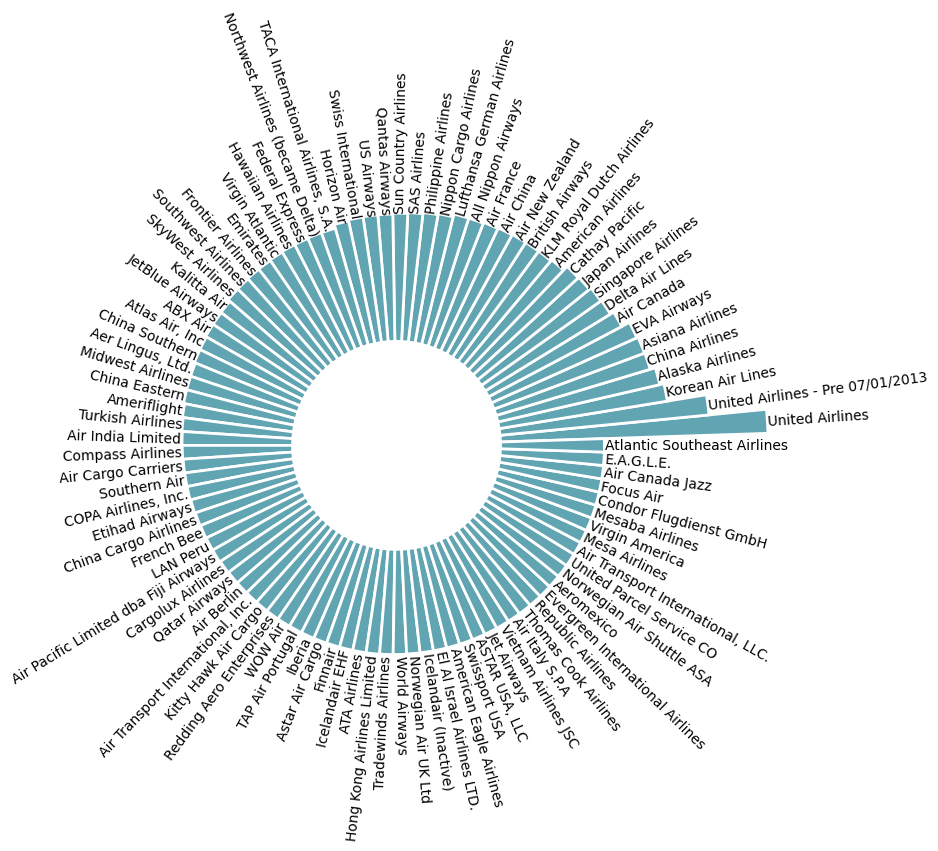

In [62]:
# initialize the figure
plt.figure(figsize = (20,10))
ax = plt.subplot(111, polar = True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 3900
lowerLimit = 1500
labelPadding = 10

# Compute max and min in the dataset
max = operating_airlines_count['cargo_flight_operated'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * operating_airlines_count.cargo_flight_operated + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(operating_airlines_count.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(operating_airlines_count.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x = angles, 
    height = heights, 
    width = width, 
    bottom = lowerLimit,
    linewidth = 2, 
    edgecolor = "white",
    color = "#61a4b2",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, operating_airlines_count["operating_airline"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x = angle, 
        y = lowerLimit + bar.get_height() + labelPadding, 
        s = label, 
        ha = alignment, 
        va = 'center', 
        rotation = rotation, 
        rotation_mode = "anchor")

Visualization 2 -

In [63]:
cargo_type_code_df = air_traffic_cargo_relational_df["cargo_type_code"].value_counts().rename_axis('cargo_type_code').reset_index(name = 'cargo_type_code_count')

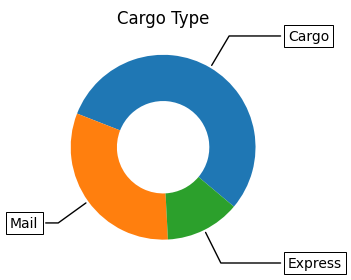

In [64]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(cargo_type_code_df.cargo_type_code_count, wedgeprops = dict(width = 0.5), startangle = -40)

bbox_props = dict(boxstyle="square,pad=0.3", fc = "w", ec = "k", lw = 0.72)
kw = dict(arrowprops = dict(arrowstyle="-"),
          bbox = bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(cargo_type_code_df.cargo_type_code[i], xy = (x, y), xytext = (1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Cargo Type")

plt.show()

Visualization 3 - 

In [65]:
geo_region_activity_type_code_cargo_weight_lbs_df = air_traffic_cargo_relational_df.groupby(['geo_region','activity_type_code'])['cargo_weight_lbs'].sum().reset_index()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2796\2647206082.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1)` for the same effect.

  sns.barplot(x = "geo_region", y = "cargo_weight_lbs", hue = "activity_type_code", data = geo_region_activity_type_code_cargo_weight_lbs_df, ci = 1)


Text(0.5, 1.0, 'Country wise Cargo weight(in lbs) for Enplaned and Deplaned')

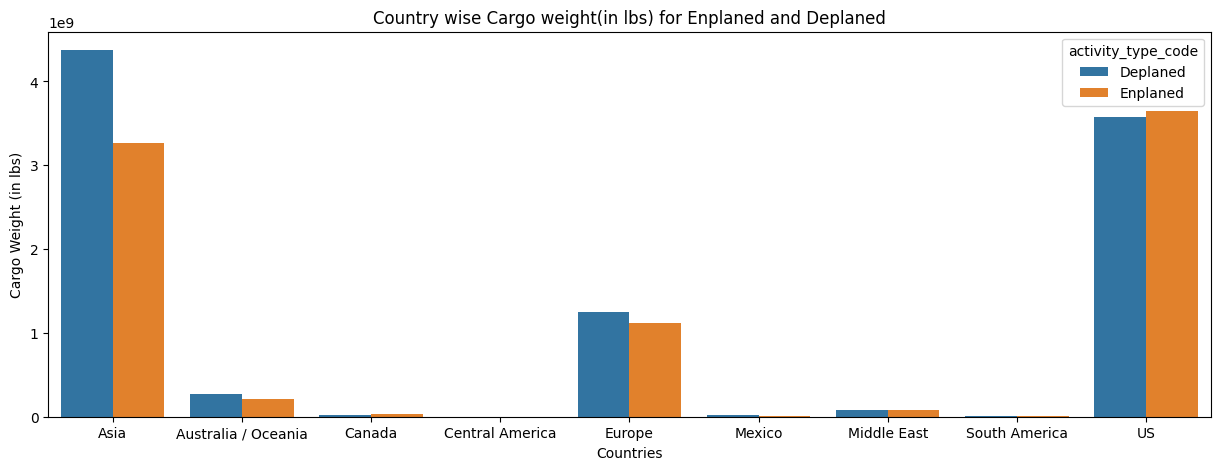

In [66]:
fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(5)

sns.barplot(x = "geo_region", y = "cargo_weight_lbs", hue = "activity_type_code", data = geo_region_activity_type_code_cargo_weight_lbs_df, ci = 1)
plt.xlabel("Countries")
plt.ylabel("Cargo Weight (in lbs)")
plt.title("Country wise Cargo weight(in lbs) for Enplaned and Deplaned")

Visualization 4 -

In [67]:
air_traffic_cargo_relational_df['activity_period'] = pd.Series(air_traffic_cargo_relational_df['activity_period'], dtype = "string")

In [68]:
activity_period_cargo_weight_lbs_df = air_traffic_cargo_relational_df.groupby('activity_period')['cargo_weight_lbs'].sum().reset_index()
activity_period_cargo_weight_lbs_df['activity_period'] = activity_period_cargo_weight_lbs_df['activity_period'].str[:4]

In [69]:
activity_period_yearly_cargo_weight_lbs_df = activity_period_cargo_weight_lbs_df.groupby('activity_period')['cargo_weight_lbs'].sum().reset_index()

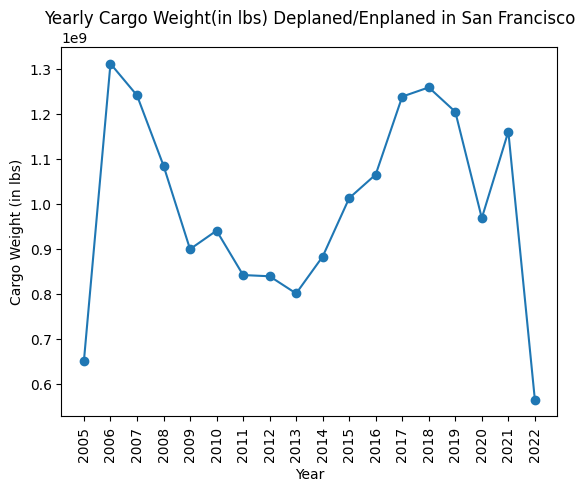

In [70]:
plt.plot('activity_period', 'cargo_weight_lbs', data = activity_period_yearly_cargo_weight_lbs_df, linestyle = '-', marker= 'o')
plt.xticks(rotation = 90) 
plt.xlabel("Year")
plt.ylabel("Cargo Weight (in lbs)")
plt.title("Yearly Cargo Weight(in lbs) Deplaned/Enplaned in San Francisco")
plt.show()

**Visualizations for Air Traffic Landing**

Visualization 1 - 

GEO_SUMMARY Column displaying the number of Domestic and International flights landing in the airport.

In [71]:
Geo_Summary = Air_Traffic_Landing_processed_df.geo_summary.value_counts()
print(Geo_Summary)

International    14429
Domestic         12508
Name: geo_summary, dtype: int64


[Text(0, 0, 'International'), Text(1, 0, 'Domestic')]

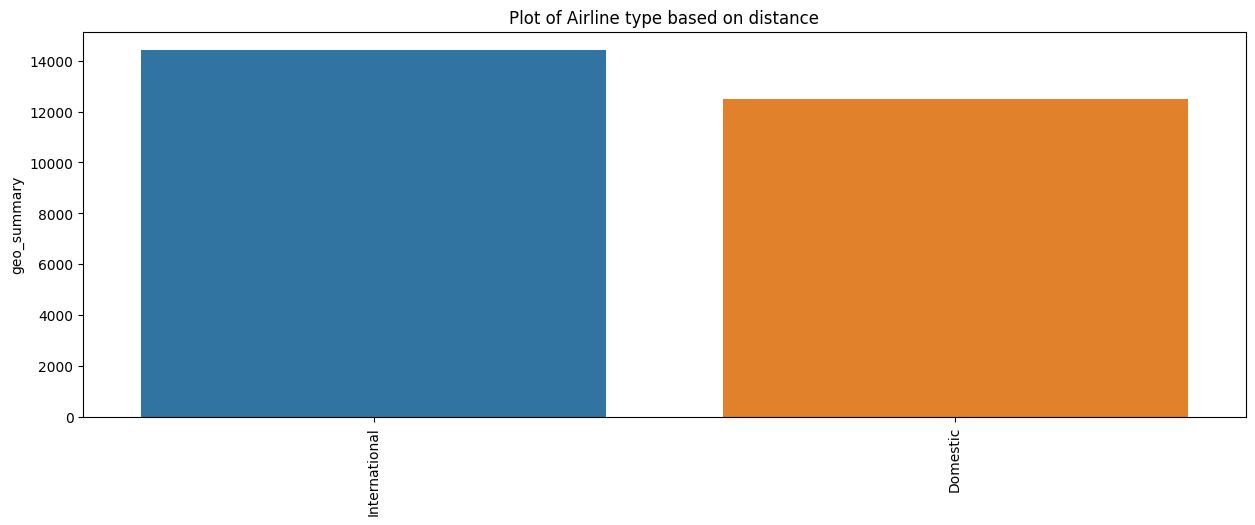

In [72]:
#Plotting the barplot
plt.figure(figsize=(15,5))
data1 = sns.barplot(x=Geo_Summary.index,y=Geo_Summary)
data1.set_title('Plot of Airline type based on distance')
data1.set_xticklabels(Geo_Summary.index,rotation=90)

Visualization 2 -

Correlation between the landing aircraft types based on the Geogrpahic Summary

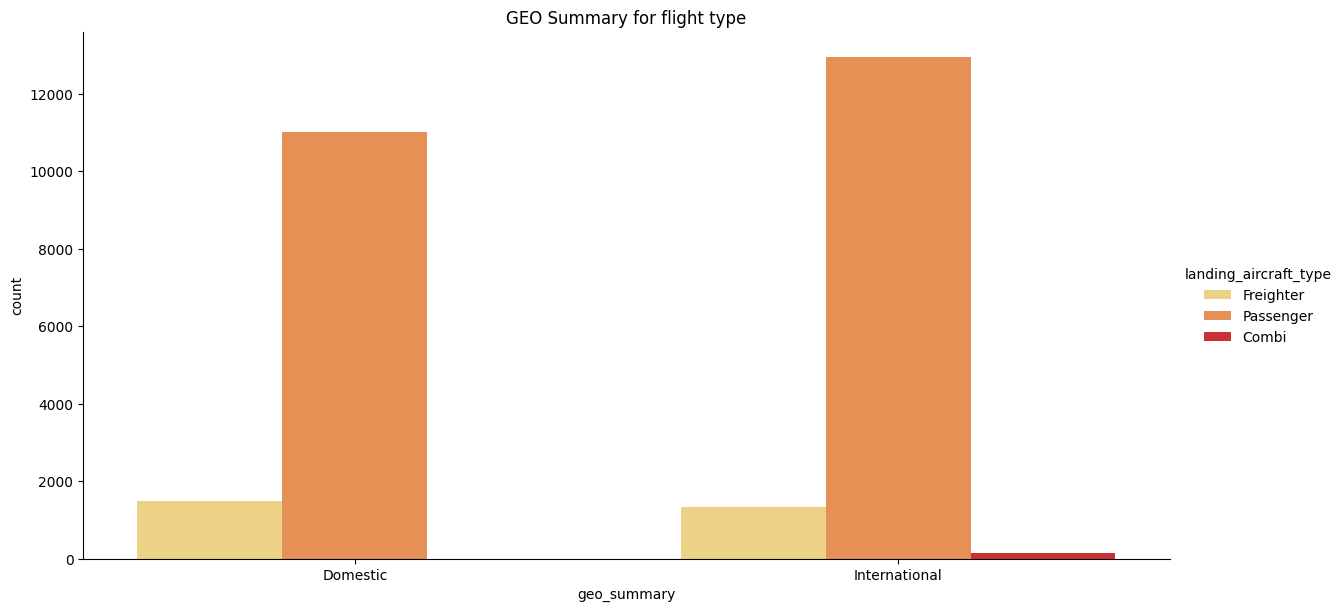

In [73]:
sns.catplot(x = "geo_summary", kind = "count", hue ="landing_aircraft_type", data = Air_Traffic_Landing_processed_df, palette = "YlOrRd", height = 6, aspect = 2,)
plt.title("GEO Summary for flight type");
plt.show()

Visualization 3 -

Plot of the GEO_Region column displaying count of countries of Origin of International Flights and count of Domestic Flights

[Text(0, 0, 'US'),
 Text(1, 0, 'Asia'),
 Text(2, 0, 'Europe'),
 Text(3, 0, 'Canada'),
 Text(4, 0, 'Mexico'),
 Text(5, 0, 'Australia / Oceania'),
 Text(6, 0, 'Central America'),
 Text(7, 0, 'Middle East'),
 Text(8, 0, 'South America'),
 Text(9, 0, 'Caribbean')]

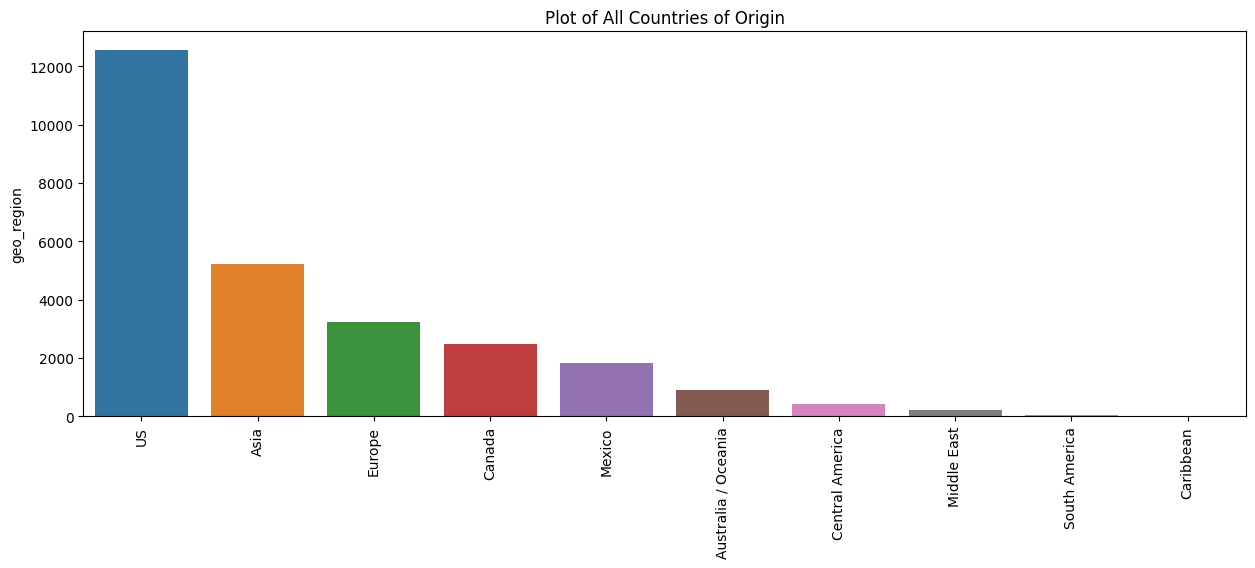

In [74]:
Geo_Region = Air_Traffic_Landing_processed_df.geo_region.value_counts()
#Plotting the barplot
plt.figure(figsize=(15,5))
data1 = sns.barplot(x=Geo_Region.index,y=Geo_Region)
data1.set_title('Plot of All Countries of Origin')
data1.set_xticklabels(Geo_Region.index,rotation=90)

Visualization 4 -

Bar Plot for Aircraft_Manufacturer column displaying the manufacturers of the landing aircrafts in San Francisco Airports

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2796\3147384435.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  data1.set_xticklabels(Aircraft_Manufacturer.index,rotation=90)


[Text(0, 0, 'Boeing'),
 Text(1, 0, 'Airbus'),
 Text(2, 0, 'Bombardier'),
 Text(3, 0, 'Embraer'),
 Text(4, 0, 'McDonnell Douglas'),
 Text(5, 0, 'Beechcraft'),
 Text(6, 0, 'Shorts'),
 Text(7, 0, 'Fairchild'),
 Text(8, 0, 'DeHavilland'),
 Text(9, 0, 'Cessna'),
 Text(10, 0, 'Swearingen'),
 Text(11, 0, 'Piper'),
 Text(12, 0, 'Lockheed'),
 Text(13, 0, 'LearJet')]

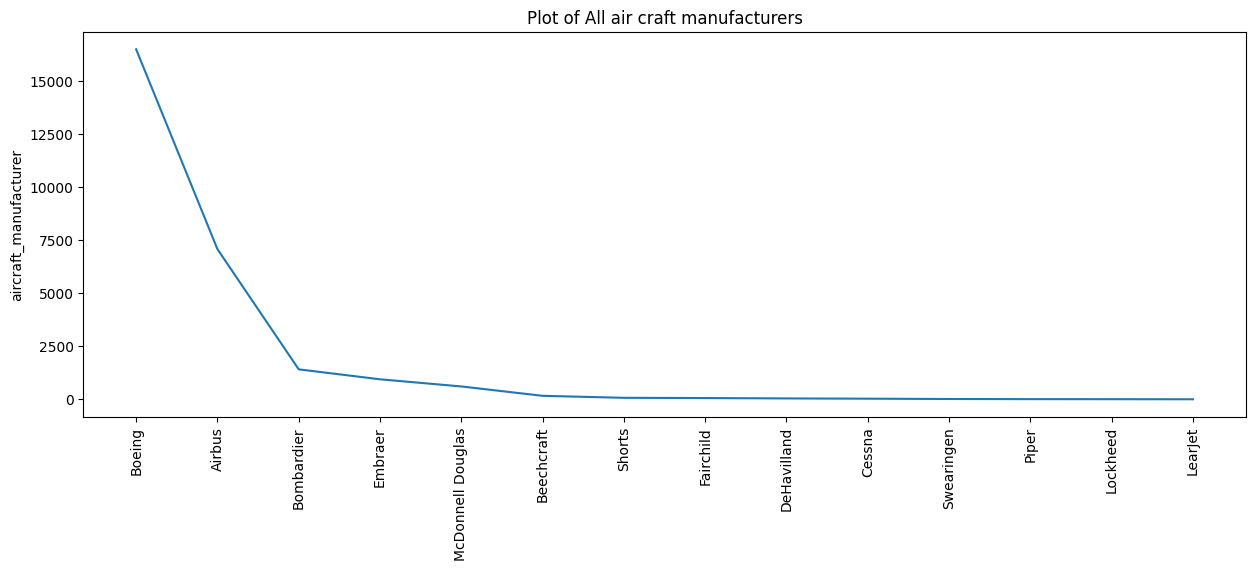

In [75]:
Aircraft_Manufacturer = Air_Traffic_Landing_processed_df.aircraft_manufacturer.value_counts()
#Plotting the barplot
plt.figure(figsize=(15,5))
data1 = sns.lineplot(x=Aircraft_Manufacturer.index,y=Aircraft_Manufacturer)
data1.set_title('Plot of All air craft manufacturers')
data1.set_xticklabels(Aircraft_Manufacturer.index,rotation=90)

Visualization 5 -

Line Plot for the Published_Airlines displaying all the Airlines operating in the San Francisco Airport

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2796\1607191354.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  data1.set_xticklabels(Published_Airline.index,rotation=90)


[Text(0, 0, 'United Airlines'),
 Text(1, 0, 'Delta Air Lines'),
 Text(2, 0, 'United Airlines - Pre 07/01/2013'),
 Text(3, 0, 'Alaska Airlines'),
 Text(4, 0, 'American Airlines'),
 Text(5, 0, 'Air Canada'),
 Text(6, 0, 'Korean Air Lines'),
 Text(7, 0, 'US Airways'),
 Text(8, 0, 'Frontier Airlines'),
 Text(9, 0, 'Southwest Airlines'),
 Text(10, 0, 'Federal Express'),
 Text(11, 0, 'Asiana Airlines'),
 Text(12, 0, 'Cathay Pacific'),
 Text(13, 0, 'Lufthansa German Airlines'),
 Text(14, 0, 'China Airlines'),
 Text(15, 0, 'Air France'),
 Text(16, 0, 'KLM Royal Dutch Airlines'),
 Text(17, 0, 'Virgin America'),
 Text(18, 0, 'EVA Airways'),
 Text(19, 0, 'British Airways'),
 Text(20, 0, 'Philippine Airlines'),
 Text(21, 0, 'Sun Country Airlines'),
 Text(22, 0, 'Air New Zealand'),
 Text(23, 0, 'TACA International Airlines, S.A.'),
 Text(24, 0, 'Hawaiian Airlines'),
 Text(25, 0, 'JetBlue Airways'),
 Text(26, 0, 'Singapore Airlines'),
 Text(27, 0, 'Japan Airlines'),
 Text(28, 0, 'Virgin Atlantic'),


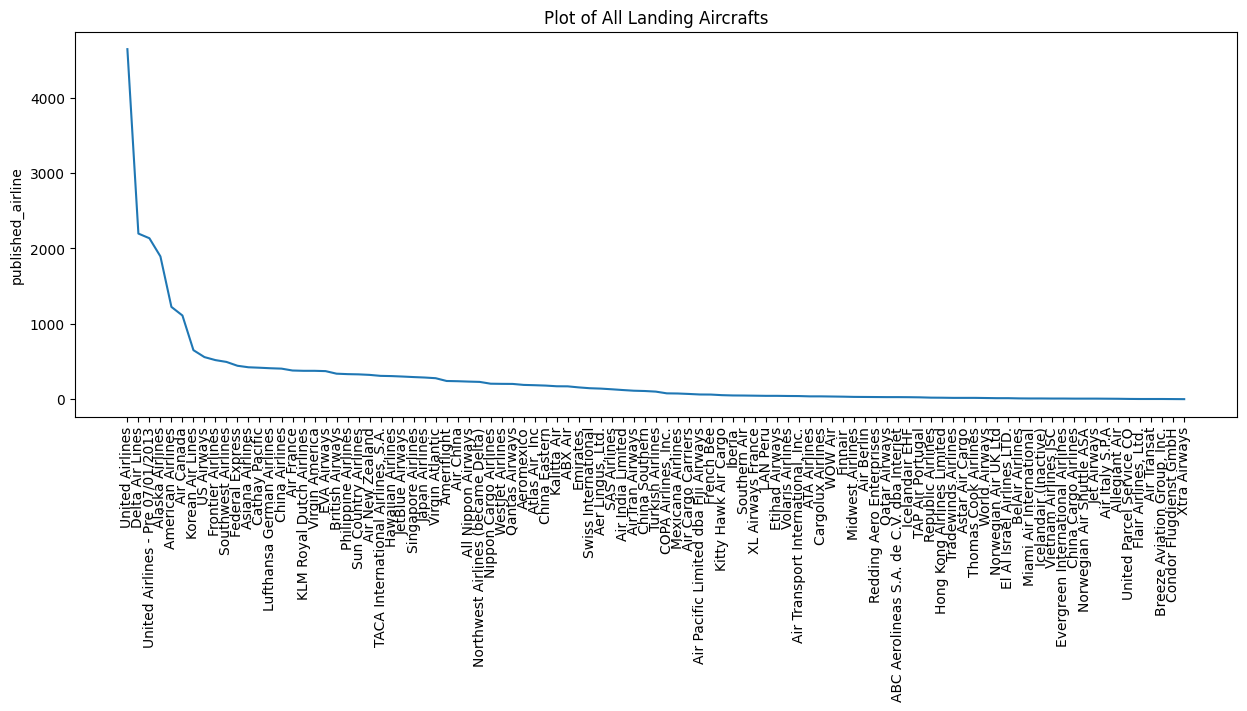

In [76]:
Published_Airline = Air_Traffic_Landing_processed_df.published_airline.value_counts()
#Plotting the barplot
plt.figure(figsize=(15,5))
data1 = sns.lineplot(x=Published_Airline.index,y=Published_Airline)
data1.set_title('Plot of All Landing Aircrafts')
data1.set_xticklabels(Published_Airline.index,rotation=90)

6. Histogram Plot for the distribution of the Landing_Count of all the Airlines operating in the San Francisco Airport

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2796\1686643989.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = "landing_count", data = Air_Traffic_Landing_processed_df, palette = "YlGnBu_r", alpha = 0.6)


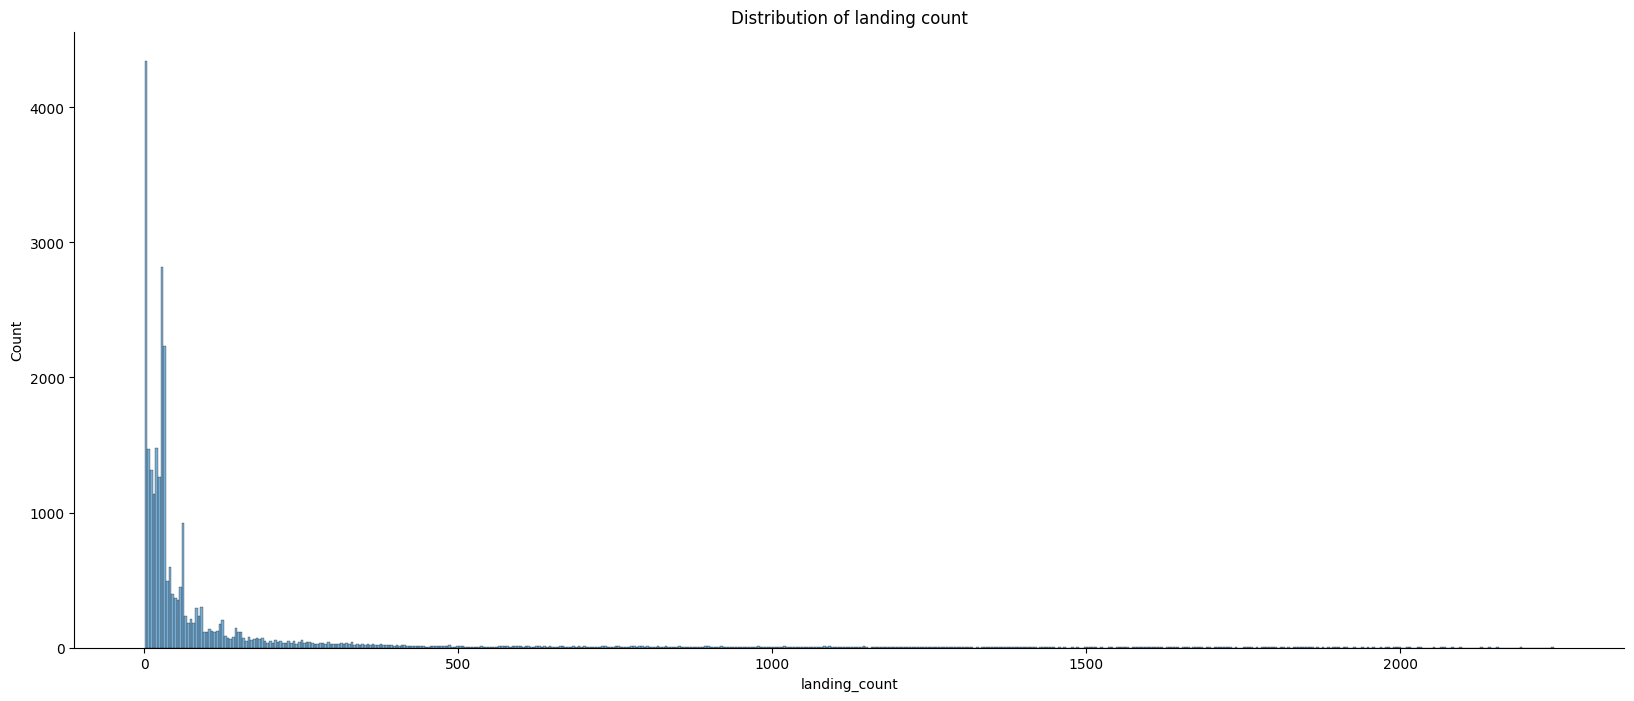

In [77]:
plt.figure(figsize = (20,8))
sns.histplot(x = "landing_count", data = Air_Traffic_Landing_processed_df, palette = "YlGnBu_r", alpha = 0.6)
plt.title("Distribution of landing count")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

7. Distribution of Landing Count and Total Landed Weight

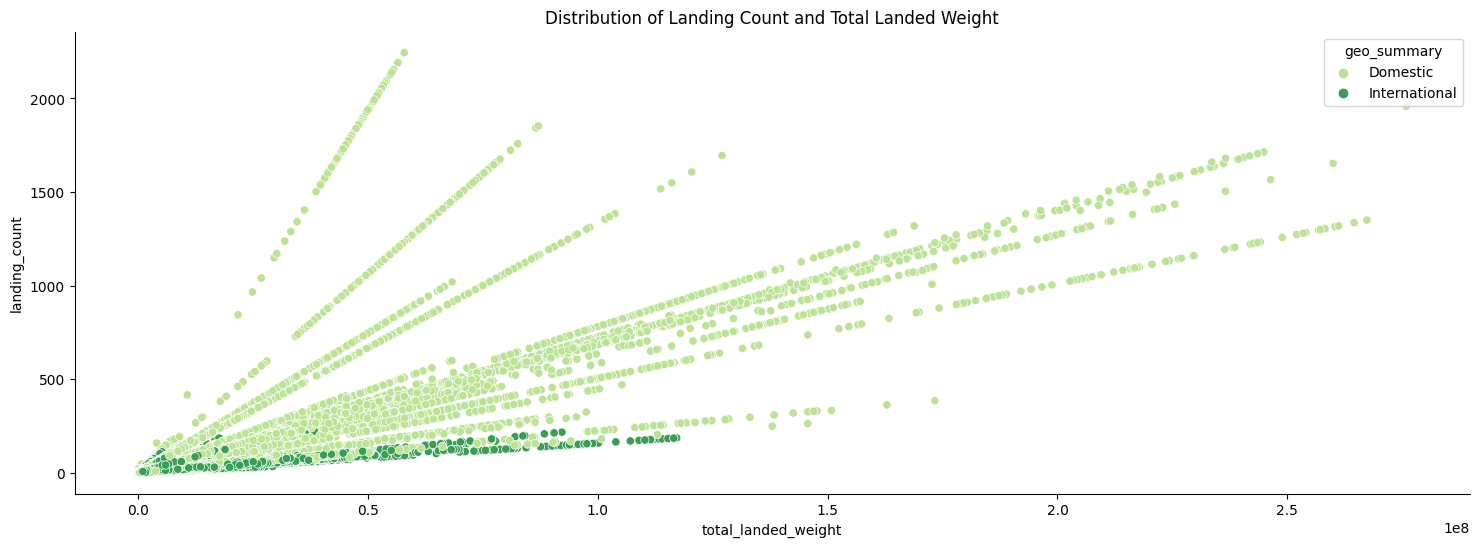

In [78]:
plt.figure(figsize = (18,6))
sns.scatterplot(x = "total_landed_weight",y ="landing_count", data = Air_Traffic_Landing_processed_df, hue ="geo_summary", palette = "YlGn")

plt.title("Distribution of Landing Count and Total Landed Weight")
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

**Visualizations for Air Traffic Passenger**

In [79]:
df.head()

,Activity_Period,Operating_Airline,Operating_Airline_IATA_Code,Published_Airline,Published_Airline_IATA_Code,GEO_Summary,GEO_Region,Activity_Type_Code,Price_Category_Code,Terminal,Boarding_Area,Passenger_Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


Top 10 Published Airlines

In [80]:
df['Published_Airline'].value_counts().head(10)

United Airlines                     3344
United Airlines - Pre 07/01/2013    2645
Alaska Airlines                     1597
Delta Air Lines                     1239
American Airlines                    864
Air Canada                           654
Southwest Airlines                   509
JetBlue Airways                      503
Virgin America                       462
Frontier Airlines                    412
Name: Published_Airline, dtype: int64

Number of unique Geo Regions -

In [81]:
df['GEO_Region'].nunique()

9

Creating a new column "Area" to check for the region passenger travel the most -

In [82]:
df['Area'] = df['GEO_Region'].apply(lambda title: title.split(":")[0])

In [83]:
df['Area'].value_counts() #Getting the most common Area for passenger movement

US                     8831
Asia                   5302
Europe                 4063
Canada                 2281
Mexico                 1920
Australia / Oceania    1322
Central America         580
Middle East             577
South America            91
Name: Area, dtype: int64

Using seaborn to create a countplot of Areas

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

<AxesSubplot: xlabel='Area', ylabel='count'>

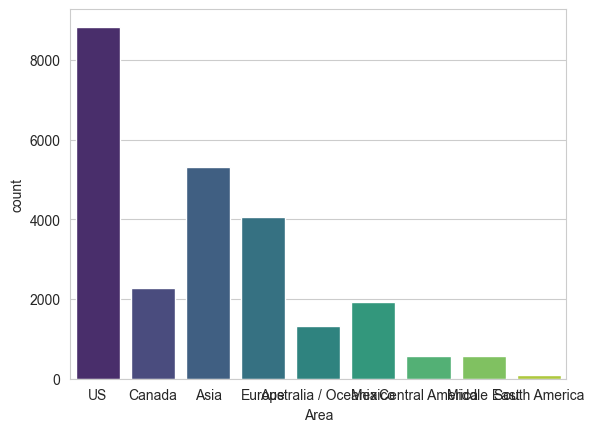

In [85]:
sns.countplot(x='Area',data=df, palette='viridis')

Checking for what price a passenger is travelling and with which Airline -

In [86]:
df['Price'] = df['Price_Category_Code'].apply(lambda title: title.split(":")[0])

In [87]:
df['Price'].value_counts()

Other       22080
Low Fare     2887
Name: Price, dtype: int64

<AxesSubplot: xlabel='Price', ylabel='count'>

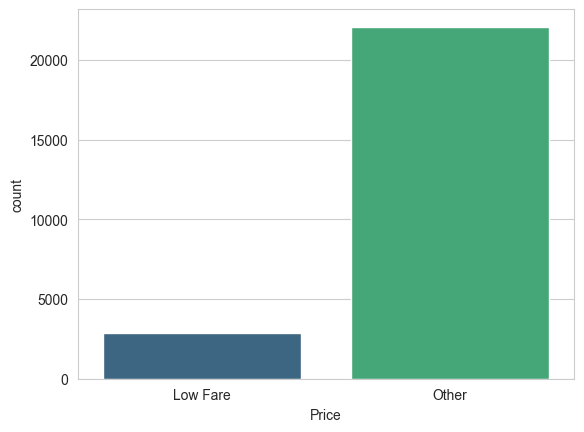

In [88]:
sns.countplot(x='Price',data=df, palette='viridis')

In [89]:
df['Terminal'].value_counts().head(10)

International    16242
Terminal 1        4228
Terminal 3        3384
Terminal 2        1086
Other               27
Name: Terminal, dtype: int64

In [90]:
df['Published_Airline'].value_counts().head(10)

United Airlines                     3344
United Airlines - Pre 07/01/2013    2645
Alaska Airlines                     1597
Delta Air Lines                     1239
American Airlines                    864
Air Canada                           654
Southwest Airlines                   509
JetBlue Airways                      503
Virgin America                       462
Frontier Airlines                    412
Name: Published_Airline, dtype: int64

In [91]:
df['Activity_Period'].value_counts().head(10)

201806    170
201906    168
201805    165
201907    165
201905    162
201807    162
201908    160
201904    159
201808    159
201909    158
Name: Activity_Period, dtype: int64

In [92]:
Activity_Period = [170,168,165,165,162,162,160,159,159,158]
Published_Airline = [3344,2645,1597,1239,864,654,509,503,462,412]

Visualising the Activity Period of any passenger with the Airlines -

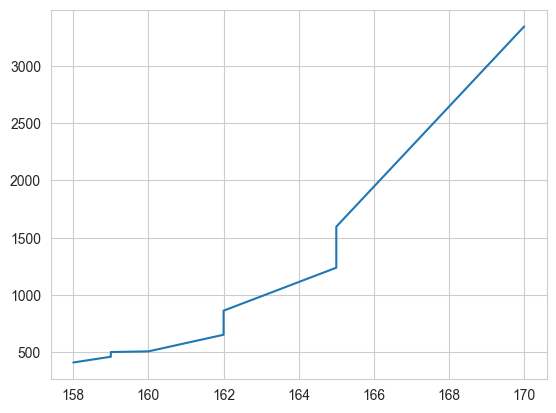

In [93]:
plt.plot(Activity_Period,Published_Airline)

Visualtisation of every passenger count with the GEO summary -

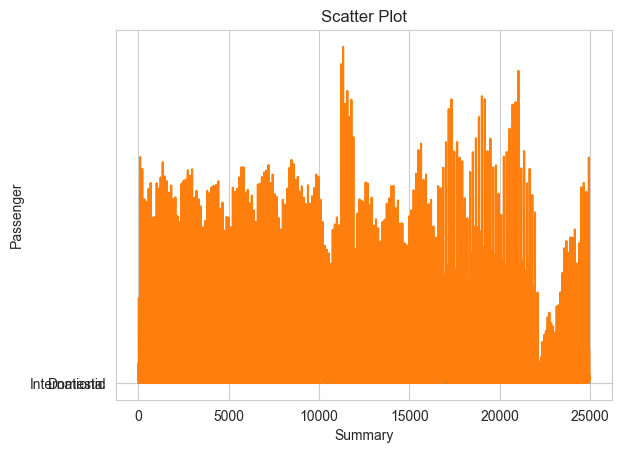

In [94]:
# Scatter plot with Geo Summary against Passenger count
plt.plot(df['GEO_Summary'])
plt.plot(df['Passenger_Count'])
 
# Adding Title to the Plot
plt.title("Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel('Summary')
plt.ylabel('Passenger')
 
plt.show()

Checking which Airlines travels from which Terminal

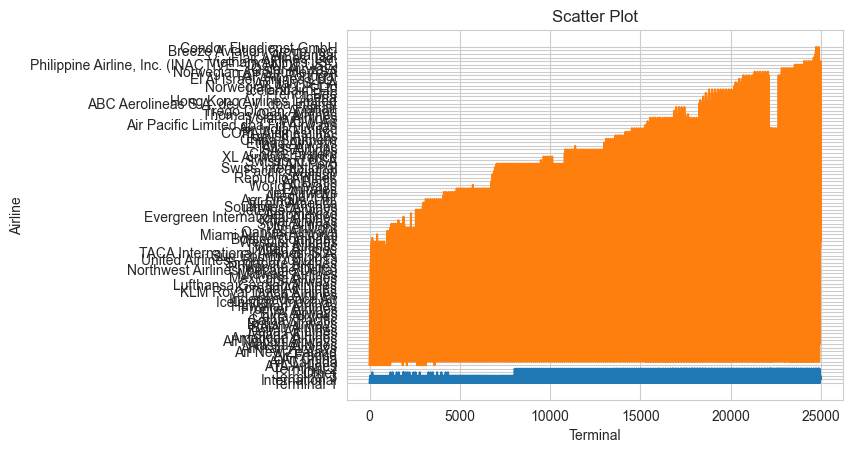

In [95]:
# Scatter plot with terminal against airlines
plt.plot(df['Terminal'])
plt.plot(df['Published_Airline'])
 
# Adding Title to the Plot
plt.title("Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel('Terminal')
plt.ylabel('Airline')
 
plt.show()

Getting information about the Operating airlines count

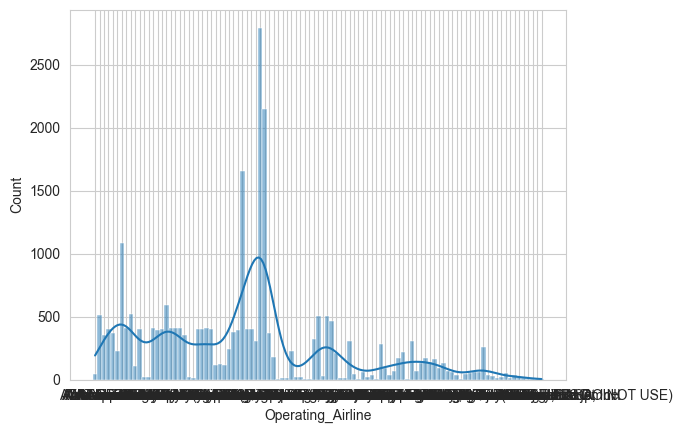

In [96]:
sns.histplot(x='Operating_Airline', data=df, kde=True)
plt.show()

Visualising all the operational Airlines with consideration of price categories

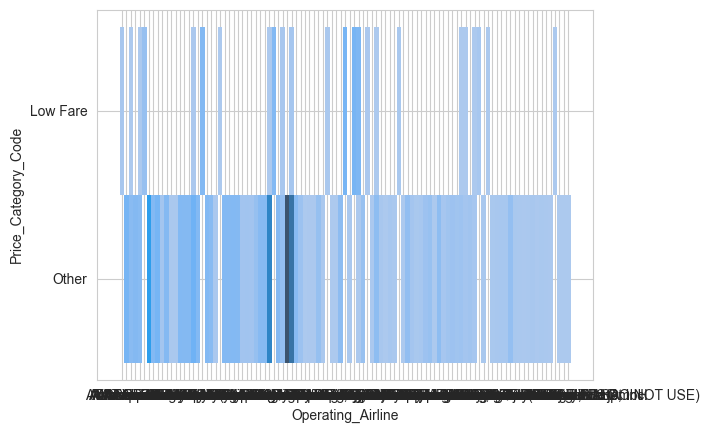

In [97]:
sns.histplot(x='Operating_Airline',y='Price_Category_Code', data=df, kde=True)
plt.show()

**Visualizations for Aircrafts**

In [98]:
visualization_df['airline'].value_counts().head(10)

Delta Air Lines                     1296
Southwest Airlines                  1007
United Airlines                      996
American Airlines                    742
Skywest Airlines                     500
Alaska Airlines                      407
US Airways                           307
United Airlines - Pre 07/01/2013     253
JetBlue Airways                      196
Air Canada                           187
Name: airline, dtype: int64

In [99]:
visualization_df['airline'].value_counts().head(10)

Delta Air Lines                     1296
Southwest Airlines                  1007
United Airlines                      996
American Airlines                    742
Skywest Airlines                     500
Alaska Airlines                      407
US Airways                           307
United Airlines - Pre 07/01/2013     253
JetBlue Airways                      196
Air Canada                           187
Name: airline, dtype: int64

In [100]:
visualization_df['aircraft_model'].nunique()

81

In [101]:
%matplotlib inline
sns.set_style('whitegrid')

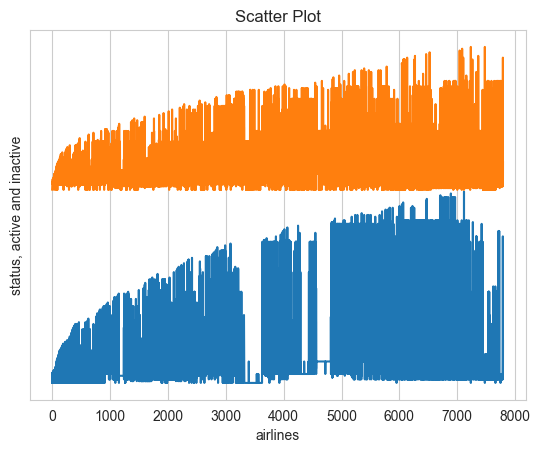

In [102]:
# Scatter plot with airline against status
plt.plot(visualization_df['airline'])
plt.plot(visualization_df['aircraft_model'])
 
# Adding Title to the Plot
plt.title("Scatter Plot")
plt.yticks([])
 
# Setting the X and Y labels
plt.xlabel('airlines')
plt.ylabel('status, active and inactive')
 
plt.show()

Combined Visualization -

In [103]:
conn = None
cursor = None
try:
    conn = psycopg2.connect(
        host = host_name,
        database = database_name,
        user = user_name,
        password = password)
    cursor = conn.cursor()
    retrieve_table_script = 'SELECT airlinefinal.aircraft_model, air_traffic_landing.landing_count FROM air_traffic_landing INNER JOIN airlinefinal ON airlinefinal.aircraft_model = air_traffic_landing.aircraft_model'
    cursor.execute(retrieve_table_script)
    tupples = cursor.fetchall()
except Exception as error:
    print(error)
finally:
    if cursor is not None:
        cursor.close()
    if conn is not None:
        conn.close()
        
column_names = ["aircraft_model" ,"landing_count"]
aircraft_model_joint_df = pd.DataFrame(tupples, columns=column_names)

In [104]:
aircraft_model_joint_df = aircraft_model_joint_df.groupby('aircraft_model')['landing_count'].sum().reset_index()

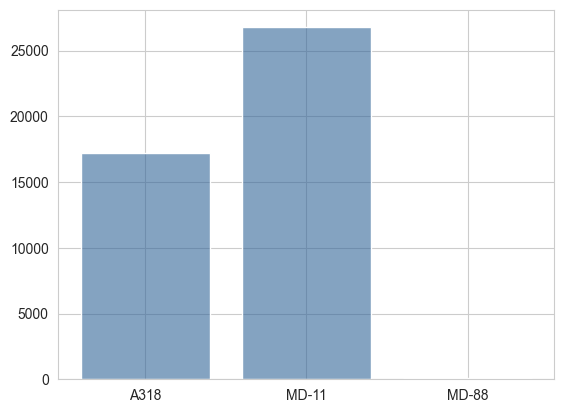

In [105]:
x_pos = np.arange(len(aircraft_model_joint_df['aircraft_model']))
plt.bar(aircraft_model_joint_df['aircraft_model'] , aircraft_model_joint_df['landing_count']  , color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(x_pos, aircraft_model_joint_df['aircraft_model'])
plt.show()